In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-10-28 21:09:14.674660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761685754.901085      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761685754.964930      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

In [3]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
X = dataset.drop("label", axis = 1)
y = dataset["label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled, X_validation_scaled, y_train, y_validation = train_test_split(
    X_train_scaled, y_train, test_size=0.10, stratify=y_train, random_state=42
)

In [8]:
classes = np.unique(y_train)
label_to_index = {label: idx for idx, label in enumerate(classes)}
y_train = np.array([label_to_index[label] for label in y_train])
y_test = np.array([label_to_index[label] for label in y_test])
y_validation = np.array([label_to_index[label] for label in y_validation])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-28 21:09:29.131882: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334 (1.30 KB)

 Trainable params: 334 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0564 - loss: 3.1810 - val_accuracy: 0.0606 - val_loss: 3.1178 - learning_rate: 0.0010
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0703 - loss: 3.1004 - val_accuracy: 0.0833 - val_loss: 3.0391 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0838 - loss: 3.0346 - val_accuracy: 0.1212 - val_loss: 2.9696 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1292 - loss: 2.9569 - val_accuracy: 0.2045 - val_loss: 2.8941 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1868 - loss: 2.8928 - val_accuracy: 0.2273 - val_loss: 2.8125 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2090 - loss: 2.8035 - val_accuracy: 0.2348 - val_loss: 2.7167 - learning_rate: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2261 - loss: 2.6959 - val_accuracy:

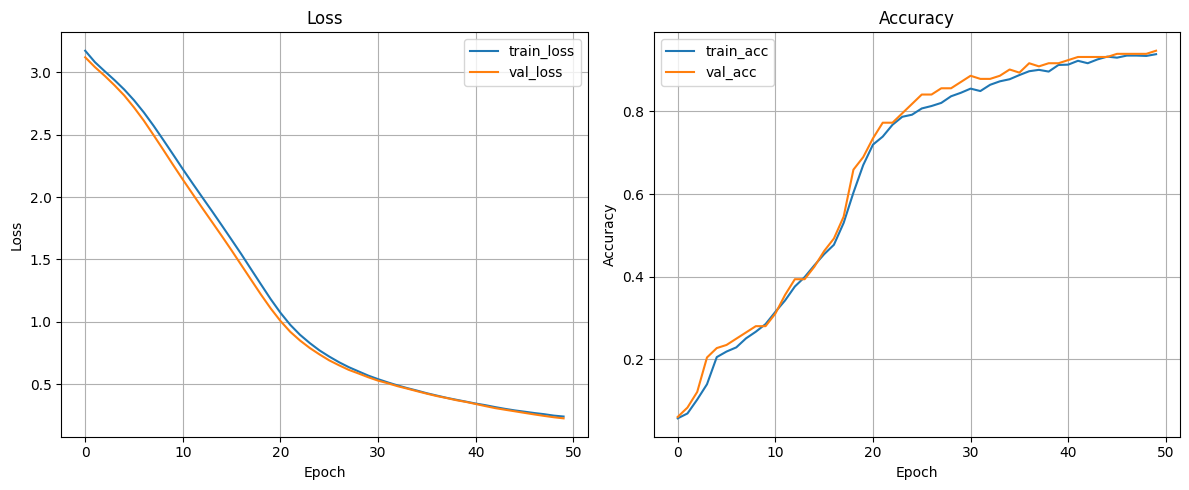

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      1.00      1.00        36
           2       0.91      0.86      0.89        37
           3       1.00      0.98      0.99        47
           4       1.00      1.00      1.00        43
           5       1.00      0.97      0.99        39
           6       0.95      1.00      0.98        40
           7       1.00      0.94      0.97        36
           8       0.88      0.86      0.87        43
           9       0.92      0.98      0.95        45
          10       0.82      0.86      0.84        37
          11       0.92      0.97      0.95        37
          12       0.93      1.00      0.96        41
          13       0.86      0.79      0.82        47
          14       0.97      1.00      0.99        37
          15       0.97      0.94      0.96        35
          16       0.63      0.83      0.7

In [9]:
model = models.Sequential([
  layers.Dense(8, activation='relu',input_shape=(X_train.shape[1],)),
  layers.Dense(8, activation='relu'),
  layers.Dense(22, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_validation_scaled, y_validation), callbacks=callbacks)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(history.history['loss'], label='train_loss')
axes[0].plot(history.history['val_loss'], label='val_loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['accuracy'], label='train_acc')
axes[1].plot(history.history['val_accuracy'], label='val_acc')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 22)             │           374 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654 (2.55 KB)

 Trainable params: 654 (2.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0191 - loss: 3.0809 - val_accuracy: 0.1061 - val_loss: 2.9956 - learning_rate: 0.0010
Epoch 2/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1233 - loss: 2.9825 - val_accuracy: 0.1288 - val_loss: 2.8922 - learning_rate: 0.0010
Epoch 3/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1356 - loss: 2.8571 - val_accuracy: 0.1515 - val_loss: 2.7453 - learning_rate: 0.0010
Epoch 4/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1514 - loss: 2.7114 - val_accuracy: 0.1894 - val_loss: 2.5545 - learning_rate: 0.0010
Epoch 5/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1840 - loss: 2.5158 - val_accuracy: 0.2045 - val_loss: 2.3614 - learning_rate: 0.0010
Epoch 6/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2336 - loss: 2.3225 - val_accuracy: 0.2576 - val_loss: 2.1977 - learning_rate: 0.0010
Epoch 7/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2871 - loss: 2.1517 - val_accuracy:

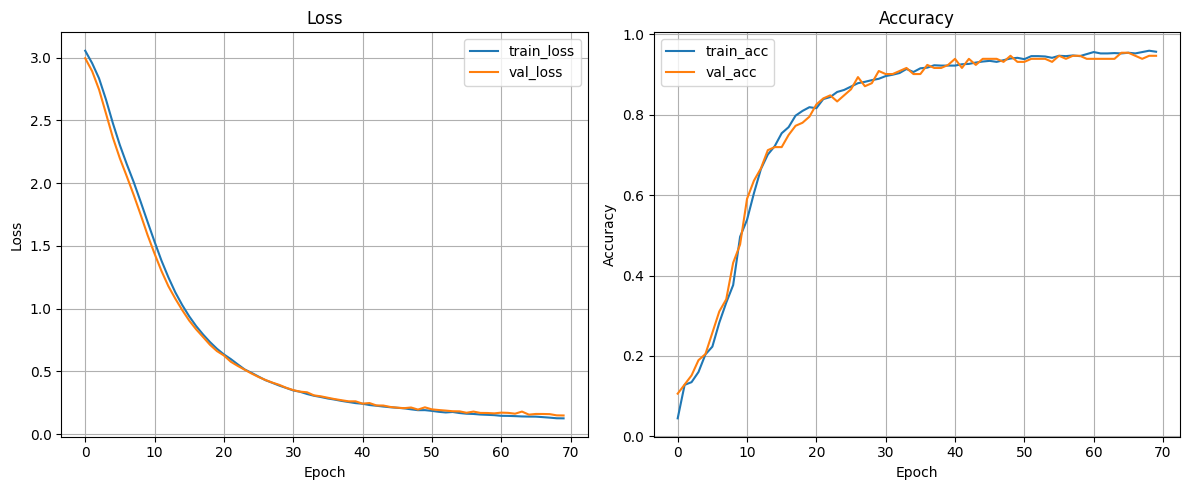

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        36
           2       0.88      0.78      0.83        37
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        43
           5       1.00      0.95      0.97        39
           6       0.98      1.00      0.99        40
           7       1.00      1.00      1.00        36
           8       0.77      0.79      0.78        43
           9       0.98      0.98      0.98        45
          10       0.76      0.95      0.84        37
          11       0.97      0.97      0.97        37
          12       0.93      0.95      0.94        41
          13       0.93      0.81      0.86        47
          14       1.00      1.00      1.00        37
          15       1.00      1.00      1.00        35
          16       1.00      0.97      0.9

In [10]:
model = models.Sequential([
  layers.Dense(8, activation='relu',input_shape=(X_train.shape[1],)),
  layers.Dense(8, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(22, activation='softmax')
])
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_scaled, y_train, epochs=70, validation_data=(X_validation_scaled, y_validation), callbacks=callbacks)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(history.history['loss'], label='train_loss')
axes[0].plot(history.history['val_loss'], label='val_loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['accuracy'], label='train_acc')
axes[1].plot(history.history['val_accuracy'], label='val_acc')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,750 (6.84 KB)

 Trainable params: 1,750 (6.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0264 - loss: 3.0801 - val_accuracy: 0.1061 - val_loss: 3.0067 - learning_rate: 0.0010
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1191 - loss: 2.9891 - val_accuracy: 0.2500 - val_loss: 2.8633 - learning_rate: 0.0010
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2266 - loss: 2.8165 - val_accuracy: 0.3030 - val_loss: 2.5595 - learning_rate: 0.0010
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2809 - loss: 2.5041 - val_accuracy: 0.3258 - val_loss: 2.1465 - learning_rate: 0.0010
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3200 - loss: 2.0687 - val_accuracy: 0.4697 - val_loss: 1.7272 - learning_rate: 0.0010
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4970 - loss: 1.6383 - val_accuracy: 0.5758 - val_loss: 1.3188 - learning_rate: 0.0010
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6059 - loss: 1.2391 - val_ac

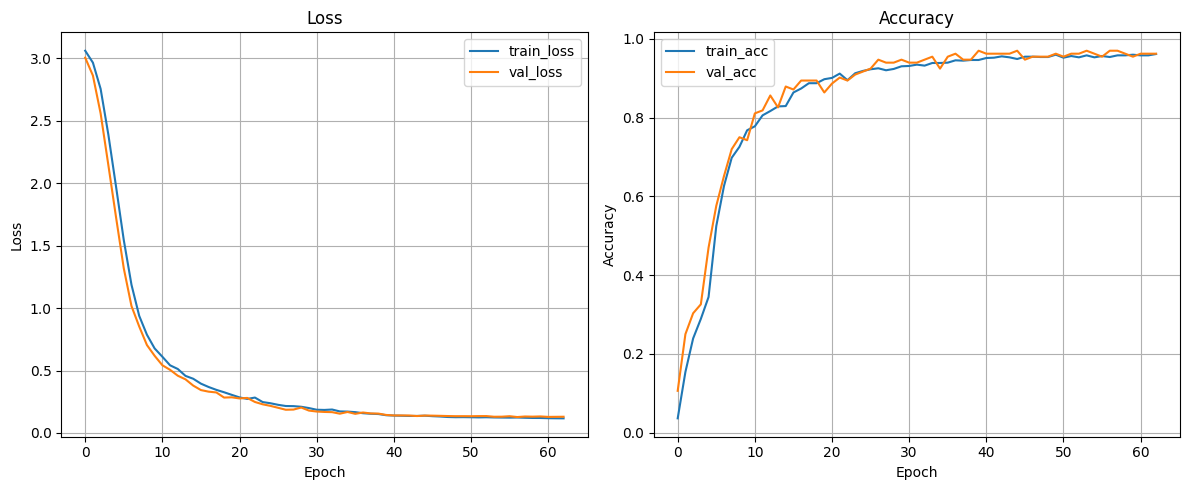

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.97      1.00      0.99        36
           2       0.82      0.84      0.83        37
           3       1.00      1.00      1.00        47
           4       0.96      1.00      0.98        43
           5       1.00      0.95      0.97        39
           6       0.93      1.00      0.96        40
           7       1.00      1.00      1.00        36
           8       0.71      0.70      0.71        43
           9       0.95      0.93      0.94        45
          10       0.80      0.95      0.86        37
          11       0.94      0.78      0.85        37
          12       0.93      1.00      0.96        41
          13       0.77      0.72      0.75        47
          14       1.00      1.00      1.00        37
          15       0.97      0.97      0.97        35
          16       0.95      1.00      0.9

In [11]:
model = models.Sequential([
  layers.Dense(8, activation='relu',input_shape=(X_train.shape[1],)),
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(32, activation='relu'),  
  layers.Dense(22, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_validation_scaled, y_validation), callbacks=callbacks)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(history.history['loss'], label='train_loss')
axes[0].plot(history.history['val_loss'], label='val_loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['accuracy'], label='train_acc')
axes[1].plot(history.history['val_accuracy'], label='val_acc')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)